# House Price Analysis

This notebook analyzes a dataset of house prices. It includes data cleaning, exploration, modeling, and evaluation using linear and ridge regression.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_score
import requests
%matplotlib inline

In [2]:
# Function to download the dataset from URL
def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, 'wb') as f:
            f.write(response.content)

## 1. Data Download and Loading

In [3]:
# Downloading the dataset
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
download(path, "kc_house_data_NaN.csv")
file_name="kc_house_data_NaN.csv"

# Loading the dataset
df = pd.read_csv(file_name)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 2. Data Overview

In [4]:
# Checking data types and basic statistics
print(df.dtypes)
df.describe()

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 3. Data Cleaning

In [5]:
# Dropping columns and checking for missing values
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

print("Number of NaN values in 'bedrooms':", df['bedrooms'].isnull().sum())
print("Number of NaN values in 'bathrooms':", df['bathrooms'].isnull().sum())

# Replacing NaN values with column means
df['bedrooms'].fillna(df['bedrooms'].mean(), inplace=True)
df['bathrooms'].fillna(df['bathrooms'].mean(), inplace=True)

print("Number of NaN values in 'bedrooms' after filling:", df['bedrooms'].isnull().sum())
print("Number of NaN values in 'bathrooms' after filling:", df['bathrooms'].isnull().sum())

Number of NaN values in 'bedrooms': 13
Number of NaN values in 'bathrooms': 10
Number of NaN values in 'bedrooms' after filling: 0
Number of NaN values in 'bathrooms' after filling: 0


C:\Users\sdesh\AppData\Local\Temp\ipykernel_18408\4032182955.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bedrooms'].fillna(df['bedrooms'].mean(), inplace=True)
C:\Users\sdesh\AppData\Local\Temp\ipykernel_18408\4032182955.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

## 4. Exploratory Data Analysis (EDA)

In [6]:
# Counting unique floor values
unique_floors = df["floors"].value_counts().to_frame()
unique_floors

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


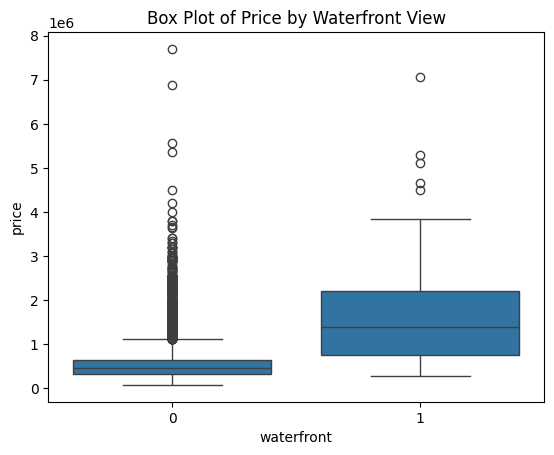

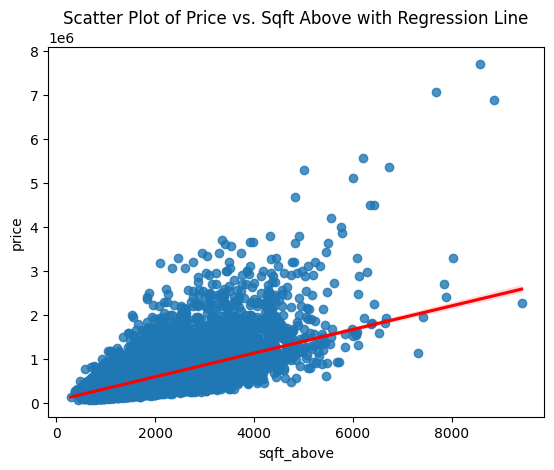

In [7]:
# Box plot of price by waterfront view
sns.boxplot(x="waterfront", y="price", data=df)
plt.title("Box Plot of Price by Waterfront View")
plt.show()

# Scatter plot of price and sqft_above
sns.regplot(x="sqft_above", y="price", data=df, line_kws={"color": "red"})
plt.title("Scatter Plot of Price vs. Sqft Above with Regression Line")
plt.show()

In [9]:

# Selecting only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Calculating the correlation of all numeric columns with 'price'
numeric_df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

## 5. Simple Linear Regression

In [10]:
# Simple Linear Regression with 'long' as the predictor
X = df[['long']]
Y = df[['price']]
lm = LinearRegression()
lm.fit(X, Y)
print("R^2 score for simple linear regression with 'long':", lm.score(X, Y))

R^2 score for simple linear regression with 'long': 0.00046769430149007363


## 6. Multiple Linear Regression

In [11]:
# Multiple Linear Regression with selected features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", 
            "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
Y = df['price']
lm.fit(X, Y)
print("R^2 score for multiple linear regression:", lm.score(X, Y))

R^2 score for multiple linear regression: 0.6576378970386156


## 7. Polynomial Regression with Pipeline

In [12]:
# Pipeline with Polynomial Features
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
])
pipeline.fit(X, Y)
print("R^2 score for polynomial regression pipeline:", pipeline.score(X, Y))

R^2 score for polynomial regression pipeline: 0.7513400538020479


## 8. Ridge Regression with Train/Test Split

In [13]:
# Splitting data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("Number of test samples:", x_test.shape[0])
print("Number of training samples:", x_train.shape[0])

# Ridge Regression
ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
print("R^2 score for Ridge regression:", ridge.score(x_test, y_test))

Number of test samples: 3242
Number of training samples: 18371
R^2 score for Ridge regression: 0.6478759163939111


## 9. Polynomial Ridge Regression

In [14]:
# Applying polynomial transformation and Ridge regression
pr = PolynomialFeatures(degree=2)
X_train_pr = pr.fit_transform(x_train)
X_test_pr = pr.fit_transform(x_test)

ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(X_train_pr, y_train)
print("R^2 score for polynomial Ridge regression:", ridge_poly.score(X_test_pr, y_test))

R^2 score for polynomial Ridge regression: 0.7002744271710597
